In [1]:
import numpy as np
import numpy.random as r
import scipy.stats as s
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def init(n=10):
    qa = r.normal(0, 1, n) # action values
    R = r.normal(qa, 1) # action rewards
    Q = np.zeros(n) # estimated value of action
    N = np.zeros(n) # action counter
    return Q, N, R, qa

In [3]:
def get_reward(a, qa):
    return r.normal(qa[a], 1)

In [4]:
def bandit(eps=0.1, steps=1000):
    Q, N, R, qa = init()
    rewards = np.zeros(steps)
    qs, actions = [], []
    for i in range(steps):
        explore = r.binomial(1, eps)
        
        a = None
        if (explore): # explore
            a = r.randint(len(Q))
        else: # exploit
            #a = r.choice(np.where(np.isclose(Q, Q.max()))[0]) # argmax with breaking ties with random choice
            a = np.argmax(Q)
        
        rewards[i] = get_reward(a, qa)
        N[a] += 1
        Q[a] = Q[a] + (rewards[i] - Q[a]) / (N[a])
        qs.append(Q)
    
    return rewards, Q, N, actions

In [5]:
eps = [.1, .01, 0., .5]
rr = np.zeros((2000, len(eps), 1000))
for i in range(2000):
    for j, e in enumerate(eps):
        rewards, Q, N, actions = bandit(e, steps=1000)
        rr[i, j] = rewards


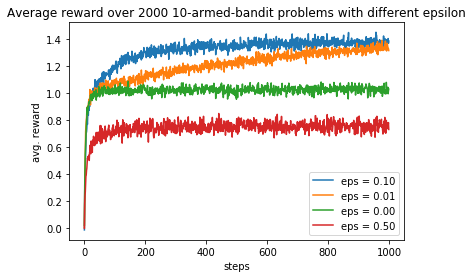

In [6]:
fig, ax = plt.subplots(1)
ax.set(title='Average reward over 2000 10-armed-bandit problems with different epsilon', xlabel='steps', ylabel='avg. reward')
avgs = np.mean(rr, axis=0)
for j, e in enumerate(eps):
    ax.plot(avgs[j], label='eps = %.2f' % (e))

plt.legend()